# **Loading Complete Data**

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse

unclean_data=pd.read_csv('complete_dataset_uncleaned_new.csv')
data3=unclean_data.iloc[:,2:]
data3.index=data3.location
data3.pop('date')
data3.pop('location')

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(data3)
c=data3.columns
i=data3.index

data2 = pd.DataFrame(scaler.transform(data3))

data2.columns=c
data2.index=i
data2=data2.groupby('location').mean()
data2=data2.iloc[:,:-1]
data2

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
location,,,,,,,,,,,,,
Afghanistan,0.000110,0.000450,0.188106,0.019696,0.353820,0.002642,0.009828,0.802514,0.291131,NaN,NaN,0.036232,0.345085
Albania,0.002417,0.002831,0.184590,0.117952,0.551752,0.005097,0.095827,0.348540,0.307718,0.159453,0.617898,0.209420,0.755602
Algeria,0.000148,0.000360,0.177534,0.062370,0.626560,0.000838,0.113977,0.308495,0.194313,0.013667,0.322443,0.137681,0.705109
Andorra,0.013005,0.004605,0.174567,0.222609,0.442219,0.007963,NaN,0.046144,0.236290,0.658314,0.427557,0.000000,0.909770
Angola,0.000073,0.000131,0.179183,0.049423,0.632435,0.001156,0.044363,0.304900,0.099865,NaN,NaN,0.000000,0.235136
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,0.001372,0.002678,NaN,0.225971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.796534
Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.507320
Yemen,0.000009,0.000161,0.164171,0.004195,0.335638,0.002598,0.007034,0.644345,0.147596,0.170843,0.305398,0.050725,0.383627


In [2]:
data2=pd.DataFrame(data2)
data2.to_csv('Data2_2023_02_17.csv')

In [3]:
seed_value= 123

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)

In [4]:
"""j=0
importance=pd.read_csv('importance.csv')
importance=np.array(importance)
for i in importance:
  data2.iloc[:,j]=data2.iloc[:,j]*abs(i)
  j=j+1
data2"""

"j=0\nimportance=pd.read_csv('importance.csv')\nimportance=np.array(importance)\nfor i in importance:\n  data2.iloc[:,j]=data2.iloc[:,j]*abs(i)\n  j=j+1\ndata2"

In [5]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [6]:
data2=clean_dataset(data2)
temp_df=data2.iloc[:,5:]
temp_df

,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
location,,,,,,,,
Albania,0.005097,0.095827,0.348540,0.307718,0.159453,0.617898,0.209420,0.755602
Algeria,0.000838,0.113977,0.308495,0.194313,0.013667,0.322443,0.137681,0.705109
Argentina,0.000781,0.157151,0.173107,0.152674,0.366743,0.284091,0.362319,0.698835
Australia,0.000149,0.378308,0.044060,0.138118,0.293850,0.125000,0.278261,0.901105
Austria,0.005189,0.385084,0.102028,0.181449,0.644647,0.329545,0.534058,0.844338
...,...,...,...,...,...,...,...,...
Vanuatu,0.001096,0.019443,0.723870,0.373392,0.061503,0.380682,0.000000,0.513594
Vietnam,0.014990,0.047393,0.257493,0.169601,0.020501,0.542614,0.188406,0.660890
Yemen,0.002598,0.007034,0.644345,0.147596,0.170843,0.305398,0.050725,0.383627


In [7]:
temp_df=pd.DataFrame(temp_df)
temp_df.to_csv('temp_df_2023_02_17.csv')

# **Standardizing Data**

In [8]:
#data=clean_dataset(data.iloc[:,1:])
#data=pd.DataFrame(scaler.inverse_transform(scaled_data))
#data

In [9]:
Ind=pd.DataFrame(temp_df[temp_df.index=='India'])
Ind

,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
location,,,,,,,,
India,0.021915,0.049585,0.314566,0.318213,0.041002,0.183239,0.038406,0.489393


# Finding Nearest Neighbour of Target Country

In [10]:
dist=[]
a=Ind
from scipy.spatial import distance
for index,row in temp_df.iterrows():
  row=pd.DataFrame(row)
  dst = distance.euclidean(a, row)
  dist.append(dst)

In [11]:
dst_target=pd.DataFrame(dist,temp_df.index)
dst_target.columns=['distance']
dst_target

,distance
location,
Albania,0.553857
Algeria,0.310632
Argentina,0.569644
Australia,0.713092
Austria,0.966523
...,...
Vanuatu,0.461932
Vietnam,0.454838
Yemen,0.427981


In [12]:
dst_target=dst_target.sort_values(by=['distance'])
dst_target

,distance
location,
India,0.000000
Djibouti,0.193099
Paraguay,0.223041
El Salvador,0.224586
Dominican Republic,0.240117
...,...
Qatar,1.041149
Luxembourg,1.042445
Kiribati,1.066379


In [13]:
dst_target=pd.DataFrame(dst_target)
dst_target.to_csv('dst_target_2023_02_17.csv')

In [14]:
#X=X.iloc[:,[0,1,3,5,6,7,8,11]]
data = pd.read_csv('complete_dataset_cleaned_new.csv')
data.pop('Pkey')
data.pop('human_development_index')
data.pop('gdp_percentage_weekly')
data=data[data.location!='Romania']
data=data[data.location!='Latvia']
data=data[data.location!='Estonia']
data=data[data.location!='Ireland']
data=data[data.location!='Switzerland']
data=data[data.location!='Malta']

data=data.iloc[:,:-2]
data=data.iloc[:,1:]
data.head()
data

,location,date,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
0,Algeria,7/17/2020,13.423,0.113,1.20,0.00,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.403
1,Algeria,7/18/2020,13.604,0.249,1.18,0.00,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.517
2,Algeria,7/20/2020,13.740,0.204,1.15,0.00,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.449
3,Algeria,7/21/2020,13.287,0.294,1.14,0.00,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.268
4,Algeria,7/22/2020,13.446,0.249,1.13,0.00,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23864,United States,4/26/2022,133.965,0.950,1.22,174.23,28.00,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,4.706
23865,United States,4/27/2022,266.521,2.386,1.21,174.37,27.99,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,4.706
23866,United States,4/28/2022,228.812,1.223,1.21,174.51,27.99,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,4.733
23867,United States,4/29/2022,181.817,1.255,1.20,174.67,27.99,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,4.822


In [15]:
temp=data.groupby('location').mean()
available=temp.index
available

Index(['Algeria', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia',
       'Bulgaria', 'Canada', 'Chile', 'Cyprus', 'Czechia', 'Denmark',
       'Finland', 'France', 'Germany', 'Iceland', 'Israel', 'Italy', 'Japan',
       'Luxembourg', 'Malaysia', 'Netherlands', 'Portugal', 'Serbia',
       'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain',
       'Sweden', 'United Kingdom', 'United States'],
      dtype='object', name='location')

In [16]:
dst_target=dst_target.loc[dst_target.index.isin(available)]

In [17]:
dst_target

,distance
location,
Algeria,0.310632
South Africa,0.377273
Malaysia,0.471387
Argentina,0.569644
Portugal,0.630524
Canada,0.642320
Finland,0.682057
United States,0.685263
Slovenia,0.691004


In [18]:
dst_target2=pd.DataFrame(dst_target)
dst_target.to_csv('dst_target2_2023_02_17.csv')

#**Selecting Closest Country**

In [19]:
c=dst_target.index
n1=c[0]

In [20]:
n1

'Algeria'

In [21]:
data1=data[data['location']==n1]
data1.pop('location')
data1.index=data1.date
data1.pop('date')
data1

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,
7/17/2020,13.423,0.113,1.20,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.403
7/18/2020,13.604,0.249,1.18,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.517
7/20/2020,13.740,0.204,1.15,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.449
7/21/2020,13.287,0.294,1.14,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.268
7/22/2020,13.446,0.249,1.13,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/26/2022,0.023,0.000,0.78,0.0,45.32,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,0.023
4/27/2022,0.023,0.000,0.74,0.0,45.32,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,0.023
4/28/2022,0.068,0.000,0.71,0.0,45.32,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,0.023


In [22]:
a=data1.index
b=data1.columns
data1=pd.DataFrame(scaler.transform(data1))
data1.index=a
data1.columns=b
df=data1.iloc[:,[0,1,2,3,4,5,13]]
df=clean_dataset(df)
df

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,icu_patients_per_million
date,,,,,,,
7/17/2020,2.635843e-04,0.000204,0.213913,0.0,0.7407,0.000838,0.007778
7/18/2020,2.671385e-04,0.000450,0.210435,0.0,0.7407,0.000838,0.008410
7/20/2020,2.698091e-04,0.000368,0.205217,0.0,0.7407,0.000838,0.008033
7/21/2020,2.609137e-04,0.000531,0.203478,0.0,0.7407,0.000838,0.007029
7/22/2020,2.640359e-04,0.000450,0.201739,0.0,0.7407,0.000838,0.006397
...,...,...,...,...,...,...,...
4/26/2022,4.516456e-07,0.000000,0.140870,0.0,0.4532,0.000838,0.000128
4/27/2022,4.516456e-07,0.000000,0.133913,0.0,0.4532,0.000838,0.000128
4/28/2022,1.335300e-06,0.000000,0.128696,0.0,0.4532,0.000838,0.000128


In [23]:
#data2=unclean_data.iloc[:,3:]
#data2.head()

# **Plot Your Data**

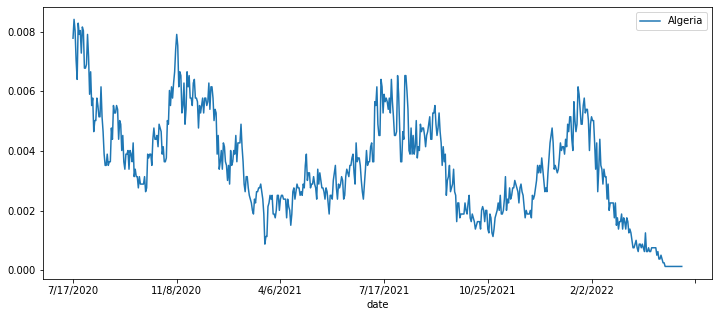

In [24]:
df.icu_patients_per_million.plot(figsize=(12,5), label=n1)
plt.legend(loc="upper right")


# **Check For Stationarity**

In [25]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [26]:
adf_test(df['icu_patients_per_million'])

1. ADF :  -2.194898101286908
2. P-Value :  0.20810236018692363
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 583
5. Critical Values :
	 1% :  -3.441616425652826
	 5% :  -2.866510292004876
	 10% :  -2.5694170294713863


# **Model for country 1**

In [27]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [29]:
#stepwise_fit = auto_arima(df['icu_patients_per_million'],exog=df.iloc[:,0:4], start_P=1,start_Q=1, start_D=1, m=14  ,trace=True, seasonal=True, suppress_warnings=True,information_criterion='aicc', alpha=0.01 )
print(df.shape)
train=df.iloc[:-90,:]
test=df.iloc[-90:,:]
print(train.shape,test.shape)
#print(test.iloc[0],test.iloc[-1])

(588, 7)
(498, 7) (90, 7)


90
1.177776424698434e-06


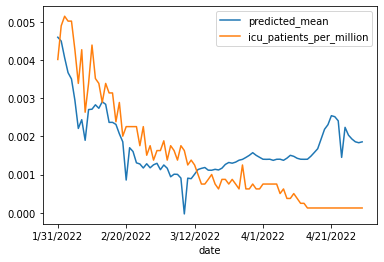

In [30]:
modela=SARIMAX(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:4] ,order=(1,0,3),seasonal_order=(0,0,0,14) )
modela=modela.fit()
modela.summary()
start=len(train)
end=len(train)+len(test)-1
pred=modela.predict(exog=test.iloc[:,0:4],start=start,end=end)
pred.index=df.index[start:end+1]
print(len(pred))
pred.plot(legend='SARIMAX Predictions')
test['icu_patients_per_million'].plot(legend=True)
test['icu_patients_per_million'].mean()
from sklearn.metrics import mean_squared_error
from math import sqrt
mse=mean_squared_error(pred,test['icu_patients_per_million'])
print(mse)

## **PREPING DATA FOR ANN**


In [31]:
predicted_list, error_list = [], []
training_data = train
modela = SARIMAX(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:4] ,order=(1,0,3),seasonal_order=(0,0,0,14))
model_fit = modela.fit()
for t in range(len(test)):
    predicted_value = pred[t]
    error_list.append(test.iloc[t,-1]-predicted_value)
    predicted_list.append(predicted_value)
    obs = test.iloc[t,-1]
    training_data[t]=obs
    
error = mean_squared_error(test.iloc[0:90,-1], predicted_list[0:90])
print( error)
training_error = model_fit.resid
training_error=np.array(training_error)

1.177776424698434e-06


##**Building ann model to predict error by seeing the previous 7 day error in prediction**

In [32]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse
model = Sequential()
model.add(Dense(50, input_dim=7, activation="tanh"))
model.add(Dense(25,  activation="tanh"))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='SGD')
train_X,train_Y = [],[]
for i in range(0 , len(training_error) - 7):
    train_X.append(training_error[i:i+7])
    train_Y.append(training_error[i+7])

train_X=np.array(train_X)
train_Y=np.array(train_Y)
new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1)) 
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)
model.fit(new_train_X,new_train_Y, epochs=100, batch_size=20,verbose=1)
test_data = []
for i in error_list:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
test_data = np.array(test_data)

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 6.4140e-07
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 6.4174e-07
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 6.3844e-07
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 6.4269e-07
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 6.4292e-07
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 6.4110e-07
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 6.4210e-07
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 6.4145e-07
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss: 6.4229e-07
Epoch 10/100
25/25 [==============================] - 0s 5ms/step - loss: 6.4128e-07
Epoch 11/100
25/25 [==============================] - 0s 4ms/step - loss: 6.4084e-07
Epoch 12/100
25/25 [==============================] - 0s 5ms/step - loss: 

3/3 [==============================] - 0s 4ms/step


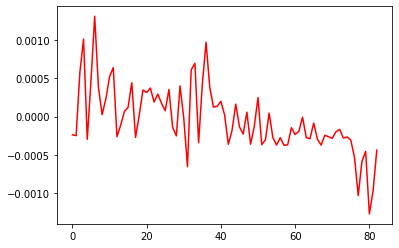

8.423286475538216e-07


In [33]:
test_X,test_Y = [],[]
for i in range(0 , len(test_data) - 7):
    test_X.append(test_data[i:i+7])
    test_Y.append(test_data[i+7])

new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)

predictions = model.predict(new_test_X)

Y = pd.DataFrame(new_test_Y)
pred = pd.DataFrame(predictions)

import matplotlib.pyplot as plt
plt.plot(predictions , color = 'r')
plt.show()
error = mse(test_data[7:],predictions)
print(error)

In [34]:
pred

,0
0,-0.000239
1,-0.000249
2,0.000574
3,0.001014
4,-0.000297
...,...
78,-0.000585
79,-0.000456
80,-0.001273
81,-0.000975


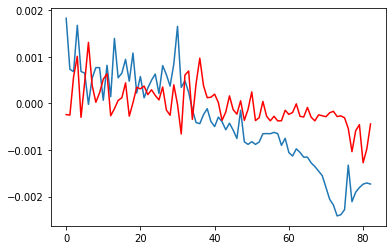

Test MSE: 


In [35]:
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()
error = mse(test_data[7:],predictions)
print(error)

##**Calculating the sum of prediction value by SARIMAX and amount error by the ann***

5.607774952622766e-07


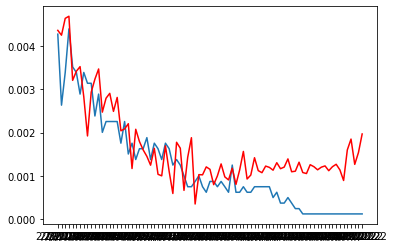

In [36]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predicted_list[i]
 pred_final.append(temp)
error = mean_squared_error(test.iloc[:83,-1],pred_final)
print(error)
Y = pd.DataFrame(test.iloc[7:,-1])
pred = pd.DataFrame(pred_final)
plt.plot(Y)
plt.plot(pred , color = 'r')
plt.rcParams['figure.figsize'] = [20, 5]
#p.plot()
plt.show()

# **Predicting for new country using 1NN**


In [37]:
unclean_data

,Pkey,continent,location,date,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
0,Afghanistan43885,Asia,Afghanistan,2/24/2020,0.125,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
1,Afghanistan43886,Asia,Afghanistan,2/25/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
2,Afghanistan43887,Asia,Afghanistan,2/26/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
3,Afghanistan43888,Asia,Afghanistan,2/27/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
4,Afghanistan43889,Asia,Afghanistan,2/28/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173549,Zimbabwe44677,Africa,Zimbabwe,4/26/2022,4.314,0.063,1.05,63.05,51.01,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
173550,Zimbabwe44678,Africa,Zimbabwe,4/27/2022,3.877,0.000,1.06,63.10,51.01,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
173551,Zimbabwe44679,Africa,Zimbabwe,4/28/2022,3.439,0.000,1.08,63.31,51.00,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
173552,Zimbabwe44680,Africa,Zimbabwe,4/29/2022,3.626,0.000,1.09,63.43,51.00,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN


In [38]:
data4=unclean_data[unclean_data.location=='India']
data4.pop('Pkey')
#data4.pop('human_development_index')
#data4.pop('gdp_percentage_weekly')
data4=data4.iloc[:,1:]
data4.pop('location')
data4.index=data4.date
data4.pop('date')


date
1/30/2020    1/30/2020
1/31/2020    1/31/2020
2/1/2020      2/1/2020
2/2/2020      2/2/2020
2/3/2020      2/3/2020
               ...    
4/26/2022    4/26/2022
4/27/2022    4/27/2022
4/28/2022    4/28/2022
4/29/2022    4/29/2022
4/30/2022    4/30/2022
Name: date, Length: 822, dtype: object

In [39]:
a=data4.index
b=data4.columns
data4=pd.DataFrame(scaler.transform(data4))
data4.index=a
data4.columns=b


In [40]:
df=data4.iloc[:,[0,1,2,3,4,5,13]]


In [41]:
df

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,icu_patients_per_million
date,,,,,,,
1/30/2020,1.963676e-08,NaN,NaN,NaN,0.1019,0.021915,NaN
1/31/2020,0.000000e+00,NaN,NaN,NaN,0.1019,0.021915,NaN
2/1/2020,0.000000e+00,NaN,NaN,NaN,0.1019,0.021915,NaN
2/2/2020,1.963676e-08,NaN,NaN,NaN,0.1019,0.021915,NaN
2/3/2020,1.963676e-08,NaN,NaN,NaN,0.1019,0.021915,NaN
...,...,...,...,...,...,...,...
4/26/2022,7.532663e-05,0.001836,0.267826,0.363916,0.3704,0.021915,NaN
4/27/2022,4.608749e-05,0.000051,0.259130,0.364352,0.3704,0.021915,NaN
4/28/2022,4.710860e-05,0.000078,0.248696,0.364789,0.3704,0.021915,NaN


In [42]:
df=df.iloc[:,:-1]
df=clean_dataset(df)

#Severity
#df.iloc[:,1]=df.iloc[:,1]*10
#reproduction rate
#df.iloc[:,2]=df.iloc[:,2]*2

traini=df.iloc[:-90,:]
testi=df.iloc[-90:,:]

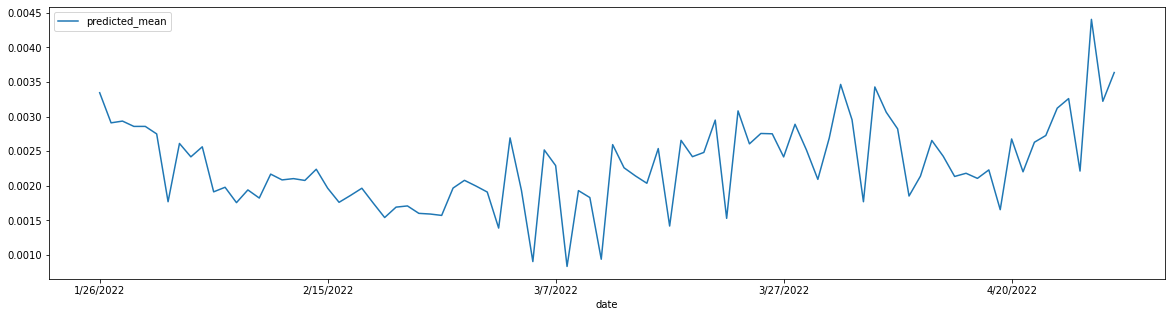

In [43]:
modela=SARIMAX(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:4] ,order=(1,0,3),seasonal_order=(0,0,0,14) )
modela=modela.fit()
modela.summary()
start=len(traini)
end=len(traini)+len(testi)-1
pred=modela.predict(exog=testi.iloc[:,0:4],start=start,end=end)
pred.index=df.index[start:end+1]
pred.plot(legend='SARIMAX Predictions')

In [44]:
pred=pd.DataFrame(pred)
pred=pred.iloc[7:,:]
predictions=pd.DataFrame(predictions)
predictions.values.tolist()
predictions=predictions[0]
predictions.values.tolist()
pred


,predicted_mean
date,
2/2/2022,0.002611
2/3/2022,0.002418
2/4/2022,0.002563
2/5/2022,0.001912
2/6/2022,0.001978
...,...
4/26/2022,0.003260
4/27/2022,0.002212
4/28/2022,0.004406


In [45]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predictions[i]
 pred_final.append(temp)
 print(temp)
#error = mse(test.iloc[:23,-1],pred_final)
#print( error)
#Y = pd.DataFrame(testi.iloc[7:,-1])


#plt.plot(pred_final , color = 'r')
#plt.show()

[0.00237246]
[0.00216862]
[0.0031368]
[0.00292541]
[0.00168035]
[0.00222323]
[0.00325175]
[0.00221131]
[0.00219367]
[0.00231281]
[0.00262365]
[0.00271608]
[0.00197486]
[0.00185129]
[0.00182565]
[0.00198251]
[0.00240671]
[0.00147639]
[0.00155701]
[0.00203773]
[0.00202249]
[0.00197381]
[0.00178036]
[0.00186474]
[0.00214035]
[0.00215446]
[0.00235093]
[0.00176979]
[0.00113474]
[0.00309233]
[0.00190986]
[0.00024887]
[0.00312828]
[0.00298858]
[0.00049152]
[0.00235442]
[0.00280233]
[0.00132104]
[0.00271892]
[0.00239368]
[0.00234153]
[0.00205607]
[0.00217506]
[0.00123471]
[0.00281882]
[0.00228567]
[0.00225292]
[0.00300689]
[0.00116686]
[0.00295635]
[0.00285429]
[0.00238849]
[0.00244691]
[0.00246127]
[0.00261443]
[0.00214518]
[0.00181667]
[0.00231471]
[0.00309482]
[0.0028075]
[0.00153462]
[0.00323426]
[0.00305497]
[0.00254649]
[0.0015607]
[0.00205368]
[0.0023601]
[0.00205283]
[0.00188955]
[0.00191691]
[0.00182186]
[0.00202995]
[0.0014857]
[0.00239662]
[0.00193475]
[0.0023219]
[0.00219005]
[0.00

In [46]:
p1=pred_final

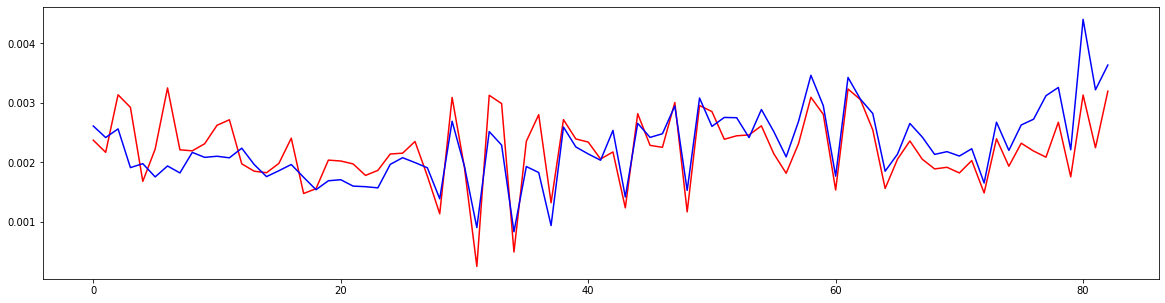

In [47]:
plt.plot(pred_final , label="SARIMAX+ANN", color = 'r')
plt.plot(pred , label="SARIMAX", color = 'b')

plt.show()

# **Model for country 2**

In [48]:
n2=c[1]
n2

'South Africa'

In [49]:
data5=data[data['location']==n2]
data5.pop('location')
data5.index=data5.date
data5.pop('date')

date
3/5/2020      3/5/2020
3/7/2020      3/7/2020
3/8/2020      3/8/2020
3/9/2020      3/9/2020
3/10/2020    3/10/2020
               ...    
4/26/2022    4/26/2022
4/27/2022    4/27/2022
4/28/2022    4/28/2022
4/29/2022    4/29/2022
4/30/2022    4/30/2022
Name: date, Length: 786, dtype: object

In [50]:
a=data5.index
b=data5.columns
data5=pd.DataFrame(scaler.transform(data5))
data5.index=a
data5.columns=b
df2=data5.iloc[:,[0,1,2,3,4,5,13]]
df2=clean_dataset(df2)
df2

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,icu_patients_per_million
date,,,,,,,
3/5/2020,3.338250e-07,0.000000,0.198261,0.000000,0.1389,0.002269,0.000000
3/7/2020,0.000000e+00,0.000000,0.198261,0.000000,0.1389,0.002269,0.000000
3/8/2020,6.676500e-07,0.000000,0.198261,0.000000,0.1389,0.002269,0.000000
3/9/2020,0.000000e+00,0.000000,0.198261,0.000000,0.1389,0.002269,0.000000
3/10/2020,1.315663e-06,0.000000,0.198261,0.000000,0.1389,0.002269,0.000000
...,...,...,...,...,...,...,...
4/26/2022,1.673641e-03,0.000457,0.262609,0.159075,0.3611,0.002269,0.017080
4/27/2022,2.106436e-03,0.000092,0.259130,0.159375,0.3610,0.002269,0.017640
4/28/2022,1.370784e-03,0.000121,0.253913,0.159430,0.3610,0.002269,0.017923


In [51]:
#stepwise_fit = auto_arima(df2['icu_patients_per_million'],exog=df2.iloc[:,0:4], start_P=1,start_Q=1, start_D=1, m=14  ,trace=True, seasonal=True,suppress_warnings=True,information_criterion='aicc', alpha=0.01 )
print(df2.shape)
train=df2.iloc[:-90,:]
test=df2.iloc[-90:,:]
print(train.shape,test.shape)
#print(test.iloc[0],test.iloc[-1])

(786, 7)
(696, 7) (90, 7)


90
0.0013801681320136899


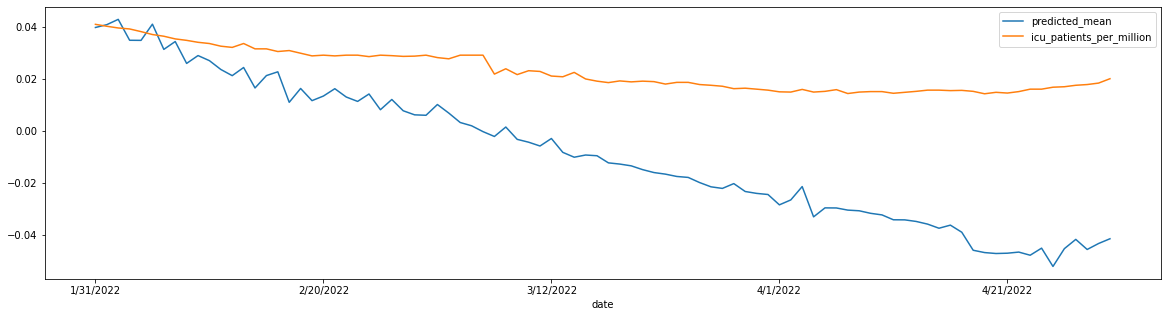

In [52]:
modela=SARIMAX(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:4] ,order=(1,0,2),seasonal_order=(1,0,0,14) )
modela=modela.fit()
modela.summary()
start=len(train)
end=len(train)+len(test)-1
pred=modela.predict(exog=test.iloc[:,0:4],start=start,end=end)
pred.index=df2.index[start:end+1]
print(len(pred))
pred.plot(legend='SARIMAX Predictions')
test['icu_patients_per_million'].plot(legend=True)
test['icu_patients_per_million'].mean()
from sklearn.metrics import mean_squared_error
from math import sqrt
mse=mean_squared_error(pred,test['icu_patients_per_million'])
print(mse)

## **PREPING DATA FOR ANN**


In [53]:
predicted_list, error_list = [], []
training_data = train
modela = SARIMAX(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:4] ,order=(1,0,2),seasonal_order=(1,0,0,14))
model_fit = modela.fit()
for t in range(len(test)):
    predicted_value = pred[t]
    error_list.append(test.iloc[t,-1]-predicted_value)
    predicted_list.append(predicted_value)
    obs = test.iloc[t,-1]
    training_data[t]=obs
    
error = mean_squared_error(test.iloc[0:90,-1], predicted_list[0:90])
print( error)
training_error = model_fit.resid
training_error=np.array(training_error)

0.0013801681320136899


##**Building ann model to predict error by seeing the previous 7 day error in prediction**

In [54]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse

model = Sequential()
model.add(Dense(50, input_dim=7, activation="tanh"))
model.add(Dense(25,  activation="tanh"))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='SGD')
train_X,train_Y = [],[]
for i in range(0 , len(training_error) - 7):
    train_X.append(training_error[i:i+7])
    train_Y.append(training_error[i+7])

train_X=np.array(train_X)
train_Y=np.array(train_Y)
new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1)) 
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)
model.fit(new_train_X,new_train_Y, epochs=100, batch_size=20,verbose=1)
test_data = []
for i in error_list:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
test_data = np.array(test_data)

Epoch 1/100
35/35 [==============================] - 0s 2ms/step - loss: 1.5178e-04
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 1.5105e-04
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 1.5121e-04
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 1.5109e-04
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 1.5101e-04
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 1.5110e-04
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 1.5089e-04
Epoch 8/100
35/35 [==============================] - 0s 2ms/step - loss: 1.5080e-04
Epoch 9/100
35/35 [==============================] - 0s 2ms/step - loss: 1.5069e-04
Epoch 10/100
35/35 [==============================] - 0s 2ms/step - loss: 1.5051e-04
Epoch 11/100
35/35 [==============================] - 0s 2ms/step - loss: 1.5074e-04
Epoch 12/100
35/35 [==============================] - 0s 2ms/step - loss: 

3/3 [==============================] - 0s 5ms/step


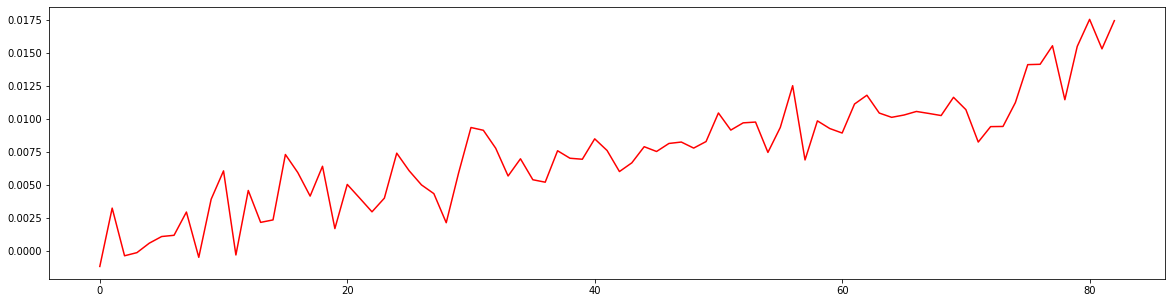

0.0009255127062173709


In [55]:
test_X,test_Y = [],[]
for i in range(0 , len(test_data) - 7):
    test_X.append(test_data[i:i+7])
    test_Y.append(test_data[i+7])

new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)

predictions = model.predict(new_test_X)

Y = pd.DataFrame(new_test_Y)
pred = pd.DataFrame(predictions)

import matplotlib.pyplot as plt
plt.plot(predictions , color = 'r')
plt.show()
error = mse(test_data[7:],predictions)
print( error)

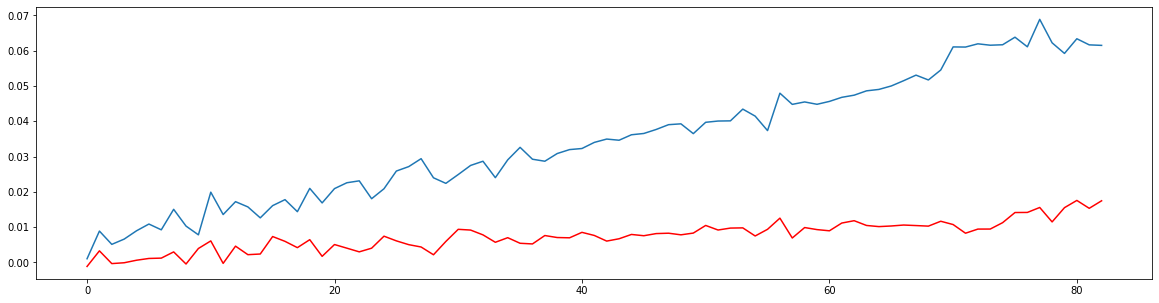

0.0009255127062173709


In [56]:
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()
error = mse(test_data[7:],predictions)
print( error)

##**Calculating the sum of prediction value by SARIMAX and amount error by the ann***

0.0006731030890334013


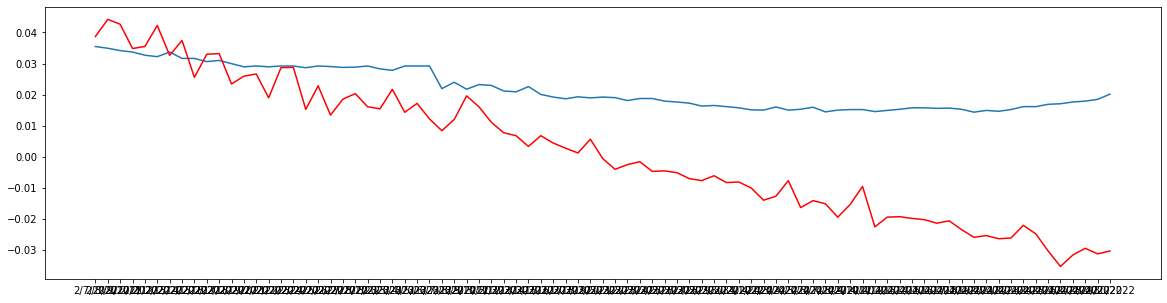

In [57]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predicted_list[i]
 pred_final.append(temp)
error = mse(test.iloc[:83,-1],pred_final)
print( error)
Y = pd.DataFrame(test.iloc[7:,-1])
pred = pd.DataFrame(pred_final)
plt.plot(Y)
plt.plot(pred , color = 'r')
plt.rcParams['figure.figsize'] = [20, 5]
#p.plot()
plt.show()

# **Predicting for new country using 2NN**


In [58]:
unclean_data

,Pkey,continent,location,date,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
0,Afghanistan43885,Asia,Afghanistan,2/24/2020,0.125,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
1,Afghanistan43886,Asia,Afghanistan,2/25/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
2,Afghanistan43887,Asia,Afghanistan,2/26/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
3,Afghanistan43888,Asia,Afghanistan,2/27/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
4,Afghanistan43889,Asia,Afghanistan,2/28/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173549,Zimbabwe44677,Africa,Zimbabwe,4/26/2022,4.314,0.063,1.05,63.05,51.01,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
173550,Zimbabwe44678,Africa,Zimbabwe,4/27/2022,3.877,0.000,1.06,63.10,51.01,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
173551,Zimbabwe44679,Africa,Zimbabwe,4/28/2022,3.439,0.000,1.08,63.31,51.00,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
173552,Zimbabwe44680,Africa,Zimbabwe,4/29/2022,3.626,0.000,1.09,63.43,51.00,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN


In [59]:
data4=unclean_data[unclean_data.location=='India']
data4.pop('Pkey')
#data4.pop('human_development_index')
#data4.pop('gdp_percentage_weekly')
data4=data4.iloc[:,1:]
data4.pop('location')
data4.index=data4.date
data4.pop('date')
data4

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,
1/30/2020,0.001,NaN,NaN,NaN,10.19,450.419,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,NaN
1/31/2020,0.000,NaN,NaN,NaN,10.19,450.419,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,NaN
2/1/2020,0.000,NaN,NaN,NaN,10.19,450.419,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,NaN
2/2/2020,0.001,NaN,NaN,NaN,10.19,450.419,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,NaN
2/3/2020,0.001,NaN,NaN,NaN,10.19,450.419,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/26/2022,3.836,1.017,1.51,133.51,37.04,450.419,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,NaN
4/27/2022,2.347,0.028,1.46,133.67,37.04,450.419,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,NaN
4/28/2022,2.399,0.043,1.40,133.83,37.04,450.419,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,NaN


In [60]:
a=data4.index
b=data4.columns
data4=pd.DataFrame(scaler.transform(data4))
data4.index=a
data4.columns=b
data4

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,
1/30/2020,1.963676e-08,NaN,NaN,NaN,0.1019,0.021915,0.049585,0.314566,0.318213,0.041002,0.183239,0.038406,0.489393,NaN
1/31/2020,0.000000e+00,NaN,NaN,NaN,0.1019,0.021915,0.049585,0.314566,0.318213,0.041002,0.183239,0.038406,0.489393,NaN
2/1/2020,0.000000e+00,NaN,NaN,NaN,0.1019,0.021915,0.049585,0.314566,0.318213,0.041002,0.183239,0.038406,0.489393,NaN
2/2/2020,1.963676e-08,NaN,NaN,NaN,0.1019,0.021915,0.049585,0.314566,0.318213,0.041002,0.183239,0.038406,0.489393,NaN
2/3/2020,1.963676e-08,NaN,NaN,NaN,0.1019,0.021915,0.049585,0.314566,0.318213,0.041002,0.183239,0.038406,0.489393,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/26/2022,7.532663e-05,0.001836,0.267826,0.363916,0.3704,0.021915,0.049585,0.314566,0.318213,0.041002,0.183239,0.038406,0.489393,NaN
4/27/2022,4.608749e-05,0.000051,0.259130,0.364352,0.3704,0.021915,0.049585,0.314566,0.318213,0.041002,0.183239,0.038406,0.489393,NaN
4/28/2022,4.710860e-05,0.000078,0.248696,0.364789,0.3704,0.021915,0.049585,0.314566,0.318213,0.041002,0.183239,0.038406,0.489393,NaN


In [61]:
df=data4.iloc[:,[0,1,2,3,4,5,13]]
df

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,icu_patients_per_million
date,,,,,,,
1/30/2020,1.963676e-08,NaN,NaN,NaN,0.1019,0.021915,NaN
1/31/2020,0.000000e+00,NaN,NaN,NaN,0.1019,0.021915,NaN
2/1/2020,0.000000e+00,NaN,NaN,NaN,0.1019,0.021915,NaN
2/2/2020,1.963676e-08,NaN,NaN,NaN,0.1019,0.021915,NaN
2/3/2020,1.963676e-08,NaN,NaN,NaN,0.1019,0.021915,NaN
...,...,...,...,...,...,...,...
4/26/2022,7.532663e-05,0.001836,0.267826,0.363916,0.3704,0.021915,NaN
4/27/2022,4.608749e-05,0.000051,0.259130,0.364352,0.3704,0.021915,NaN
4/28/2022,4.710860e-05,0.000078,0.248696,0.364789,0.3704,0.021915,NaN


In [62]:
df=df.iloc[:,:-1]
df=clean_dataset(df)
#Severity
#df.iloc[:,1]=df.iloc[:,1]*10

#Reproduction Rate
#df.iloc[:,2]=df.iloc[:,2]*2


In [63]:
traini=df.iloc[:-90,:]
testi=df.iloc[-90:,:]

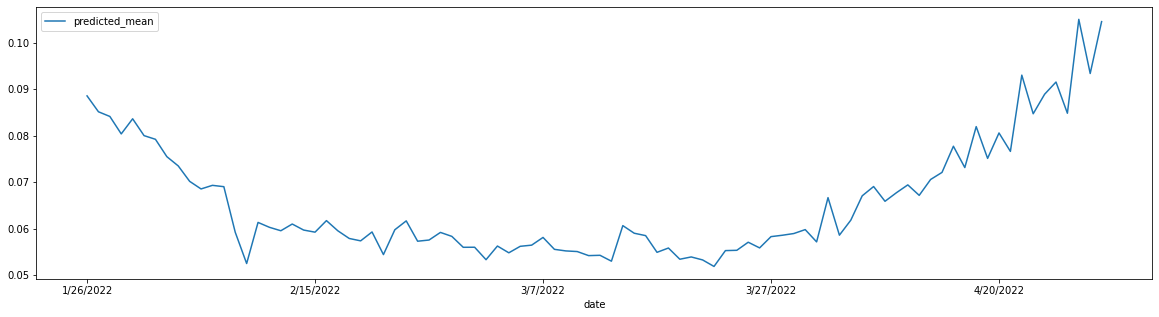

In [64]:
modela=SARIMAX(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:4] ,order=(1,0,2),seasonal_order=(1,0,0,14) )
modela=modela.fit()
modela.summary()
start=len(traini)
end=len(traini)+len(testi)-1
pred=modela.predict(exog=testi.iloc[:,0:4],start=start,end=end)
pred.index=df.index[start:end+1]
pred.plot(legend='SARIMAX Predictions')

In [65]:
pred=pd.DataFrame(pred)
pred=pred.iloc[7:,:]
predictions=pd.DataFrame(predictions)
predictions.values.tolist()
predictions=predictions[0]
predictions.values.tolist()
predictions


0    -0.001165
1     0.003254
2    -0.000357
3    -0.000120
4     0.000598
        ...   
78    0.011465
79    0.015502
80    0.017554
81    0.015320
82    0.017454
Name: 0, Length: 83, dtype: float32

In [66]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predictions[i]
 pred_final.append(temp)
 print(temp)
error = mse(test.iloc[:83,-1],pred_final)
print( error)
Y = pd.DataFrame(testi.iloc[7:,-1])


#plt.plot(pred_final , color = 'r')
#plt.show()

[0.07431826]
[0.07674121]
[0.06981364]
[0.06841451]
[0.06990636]
[0.07012136]
[0.06040193]
[0.05543937]
[0.06085382]
[0.06420093]
[0.06561159]
[0.06068707]
[0.06427497]
[0.06140406]
[0.06407523]
[0.06684114]
[0.06382581]
[0.06152429]
[0.06569765]
[0.05610752]
[0.06479725]
[0.06567495]
[0.0602557]
[0.06154716]
[0.06659309]
[0.06441234]
[0.06098521]
[0.06033719]
[0.05545289]
[0.06216533]
[0.06414738]
[0.06533712]
[0.06422191]
[0.06378334]
[0.06252463]
[0.06059712]
[0.06027657]
[0.06178285]
[0.06128251]
[0.0599412]
[0.06913952]
[0.06662106]
[0.06451151]
[0.06157413]
[0.06372412]
[0.06094786]
[0.06204879]
[0.06151306]
[0.05965296]
[0.06355827]
[0.06578936]
[0.066231]
[0.06555517]
[0.06804232]
[0.06604272]
[0.06829978]
[0.07231019]
[0.06403942]
[0.07652431]
[0.06786645]
[0.07075773]
[0.07819278]
[0.08085719]
[0.07633078]
[0.07785015]
[0.07971354]
[0.07772928]
[0.08099492]
[0.08236046]
[0.08937107]
[0.08384935]
[0.09020582]
[0.08453833]
[0.09002193]
[0.08786294]
[0.10715127]
[0.0988645]
[0.1

In [67]:
p2=pred_final

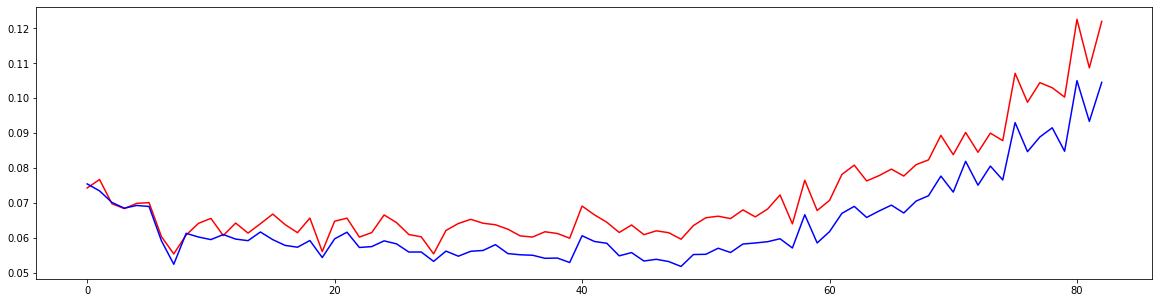

In [68]:
plt.plot(pred_final , label="SARIMAX+ANN", color = 'r')
plt.plot(pred , label="SARIMAX", color = 'b')

plt.show()

# **Model for country 3**

In [69]:
n3=c[2]
n3

'Malaysia'

In [70]:
data6=data[data['location']==n3]
data6.pop('location')
data6.index=data6.date
data6.pop('date')
data6

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,
3/24/2020,3.157,0.060,1.59,0.00,73.15,96.254,26808.164,260.942,16.74,1.0,42.4,1.9,76.16,2.055
3/25/2020,5.123,0.089,1.54,0.00,73.15,96.254,26808.164,260.942,16.74,1.0,42.4,1.9,76.16,1.787
3/26/2020,6.999,0.149,1.48,0.00,73.15,96.254,26808.164,260.942,16.74,1.0,42.4,1.9,76.16,2.115
3/27/2020,3.872,0.060,1.39,0.00,78.70,96.254,26808.164,260.942,16.74,1.0,42.4,1.9,76.16,2.234
3/28/2020,4.736,0.179,1.31,0.00,78.70,96.254,26808.164,260.942,16.74,1.0,42.4,1.9,76.16,2.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/26/2022,100.108,0.387,0.55,209.39,51.26,96.254,26808.164,260.942,16.74,1.0,42.4,1.9,76.16,3.008
4/27/2022,103.384,0.179,0.53,209.50,51.25,96.254,26808.164,260.942,16.74,1.0,42.4,1.9,76.16,2.919
4/28/2022,87.419,0.298,0.52,209.61,51.25,96.254,26808.164,260.942,16.74,1.0,42.4,1.9,76.16,2.502


In [71]:
a=data6.index
b=data6.columns
data6=pd.DataFrame(scaler.transform(data6))
data6.index=a
data6.columns=b
df3=data6.iloc[:,[0,1,2,3,4,5,13]]
df3=clean_dataset(df3)
df3

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,icu_patients_per_million
date,,,,,,,
3/24/2020,0.000062,0.000108,0.281739,0.000000,0.7315,0.004678,0.011392
3/25/2020,0.000101,0.000161,0.273043,0.000000,0.7315,0.004678,0.009906
3/26/2020,0.000137,0.000269,0.262609,0.000000,0.7315,0.004678,0.011725
3/27/2020,0.000076,0.000108,0.246957,0.000000,0.7870,0.004678,0.012384
3/28/2020,0.000093,0.000323,0.233043,0.000000,0.7870,0.004678,0.015522
...,...,...,...,...,...,...,...
4/26/2022,0.001966,0.000699,0.100870,0.570747,0.5126,0.004678,0.016675
4/27/2022,0.002030,0.000323,0.097391,0.571047,0.5125,0.004678,0.016182
4/28/2022,0.001717,0.000538,0.095652,0.571347,0.5125,0.004678,0.013870


In [72]:
#stepwise_fit = auto_arima(df3['icu_patients_per_million'],exog=df3.iloc[:,0:4], start_P=1,start_Q=1, start_D=1, m=14  ,trace=True, seasonal=True,suppress_warnings=True,information_criterion='aicc', alpha=0.01 )
print(df3.shape)
train=df3.iloc[:-90,:]
test=df3.iloc[-90:,:]
print(train.shape,test.shape)
#print(test.iloc[0],test.iloc[-1])

(768, 7)
(678, 7) (90, 7)


90
0.03712277761303127


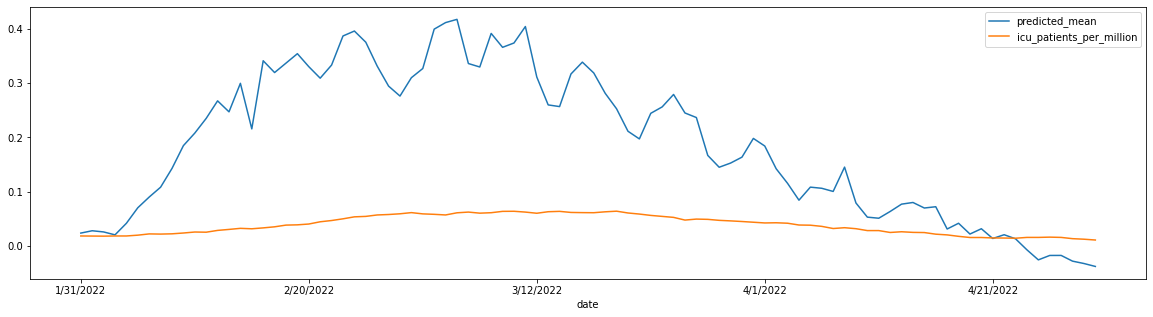

In [73]:
modela=SARIMAX(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:4] ,order=(2,0,4),seasonal_order=(2,0,1,14) )
modela=modela.fit()
modela.summary()
start=len(train)
end=len(train)+len(test)-1
pred=modela.predict(exog=test.iloc[:,0:4],start=start,end=end)
pred.index=df3.index[start:end+1]
print(len(pred))
pred.plot(legend='SARIMAX Predictions')
test['icu_patients_per_million'].plot(legend=True)
test['icu_patients_per_million'].mean()
from sklearn.metrics import mean_squared_error
from math import sqrt
mse=mean_squared_error(pred,test['icu_patients_per_million'])
print(mse)

## **PREPING DATA FOR ANN**


In [74]:
predicted_list, error_list = [], []
training_data = train
modela = SARIMAX(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:4] ,order=(2,0,4),seasonal_order=(2,0,1,14))
model_fit = modela.fit()
for t in range(len(test)):
    predicted_value = pred[t]
    error_list.append(test.iloc[t,-1]-predicted_value)
    predicted_list.append(predicted_value)
    obs = test.iloc[t,-1]
    training_data[t]=obs
    
error = mean_squared_error(test.iloc[0:90,-1], predicted_list[0:90])
print( error)
training_error = model_fit.resid
training_error=np.array(training_error)

0.03712277761303127


##**Building ann model to predict error by seeing the previous 7 day error in prediction**

In [75]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse

model = Sequential()
model.add(Dense(50, input_dim=7, activation="tanh"))
model.add(Dense(25,  activation="tanh"))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='SGD')
train_X,train_Y = [],[]
for i in range(0 , len(training_error) - 7):
    train_X.append(training_error[i:i+7])
    train_Y.append(training_error[i+7])

train_X=np.array(train_X)
train_Y=np.array(train_Y)
new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1)) 
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)
model.fit(new_train_X,new_train_Y, epochs=100, batch_size=20,verbose=1)
test_data = []
for i in error_list:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
test_data = np.array(test_data)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 1.4785e-04
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 1.4823e-04
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 1.4781e-04
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 1.4798e-04
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 1.4758e-04
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 1.4740e-04
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 1.4716e-04
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 1.4782e-04
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 1.4752e-04
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 1.4739e-04
Epoch 11/100
34/34 [==============================] - 0s 3ms/step - loss: 1.4606e-04
Epoch 12/100
34/34 [==============================] - 0s 4ms/step - loss: 

3/3 [==============================] - 0s 4ms/step


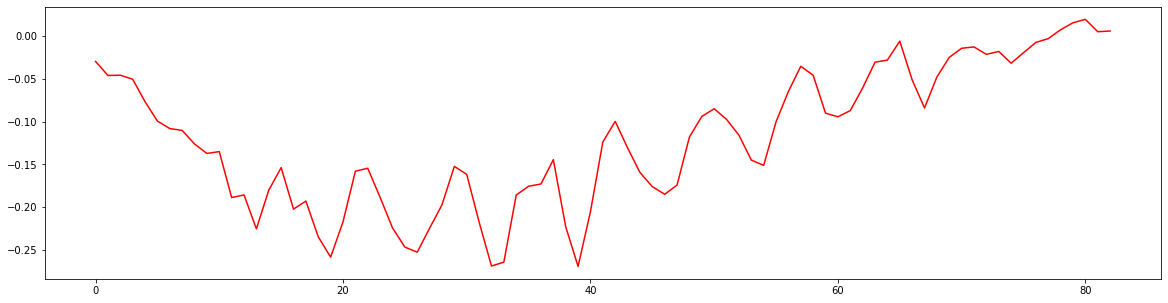

0.005551319939895988


In [76]:
test_X,test_Y = [],[]
for i in range(0 , len(test_data) - 7):
    test_X.append(test_data[i:i+7])
    test_Y.append(test_data[i+7])

new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)

predictions = model.predict(new_test_X)

Y = pd.DataFrame(new_test_Y)
pred = pd.DataFrame(predictions)

import matplotlib.pyplot as plt
plt.plot(predictions , color = 'r')
plt.show()
error = mean_squared_error(test_data[7:],predictions)
print( error)

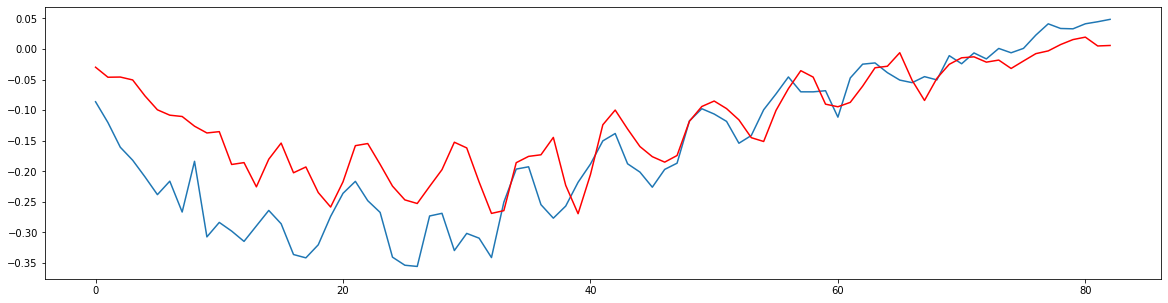

0.005551319939895988


In [77]:
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()
error = mean_squared_error(test_data[7:],predictions)
print( error)

##**Calculating the sum of prediction value by arima and amount error by the ann***

0.004617673789302967


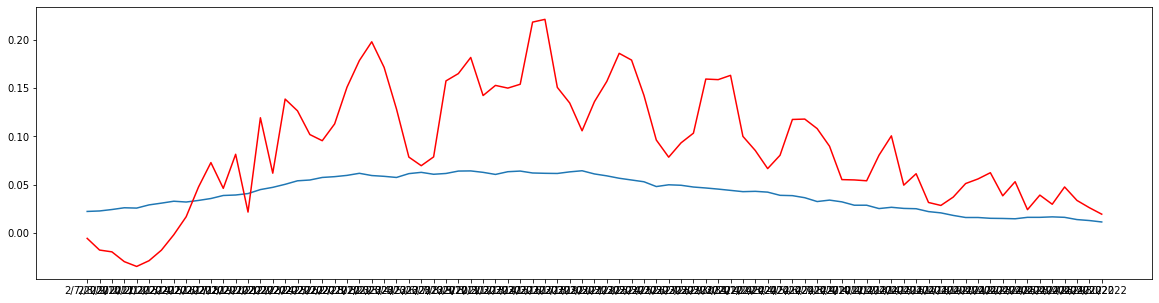

In [78]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predicted_list[i]
 pred_final.append(temp)
error = mean_squared_error(test.iloc[:83,-1],pred_final)
print( error)
Y = pd.DataFrame(test.iloc[7:,-1])
pred = pd.DataFrame(pred_final)
plt.plot(Y)
plt.plot(pred , color = 'r')
plt.rcParams['figure.figsize'] = [20, 5]
#p.plot()
plt.show()

# **Predicting for new country using 3NN**


In [79]:
data4=unclean_data[unclean_data.location=='India']
data4.pop('Pkey')
#data4.pop('human_development_index')
#data4.pop('gdp_percentage_weekly')
data4=data4.iloc[:,1:]
data4.pop('location')
data4.index=data4.date
data4.pop('date')


date
1/30/2020    1/30/2020
1/31/2020    1/31/2020
2/1/2020      2/1/2020
2/2/2020      2/2/2020
2/3/2020      2/3/2020
               ...    
4/26/2022    4/26/2022
4/27/2022    4/27/2022
4/28/2022    4/28/2022
4/29/2022    4/29/2022
4/30/2022    4/30/2022
Name: date, Length: 822, dtype: object

In [80]:
a=data4.index
b=data4.columns
data4=pd.DataFrame(scaler.transform(data4))
data4.index=a
data4.columns=b

In [81]:
df=data4.iloc[:,[0,1,2,3,4,5,13]]

In [82]:
df=df.iloc[:,:-1]
df=clean_dataset(df)
#Severity
#df.iloc[:,1]=df.iloc[:,1]*10

#Reproduction Rate
#df.iloc[:,2]=df.iloc[:,2]*2


In [83]:
traini=df.iloc[:-90,:]
testi=df.iloc[-90:,:]

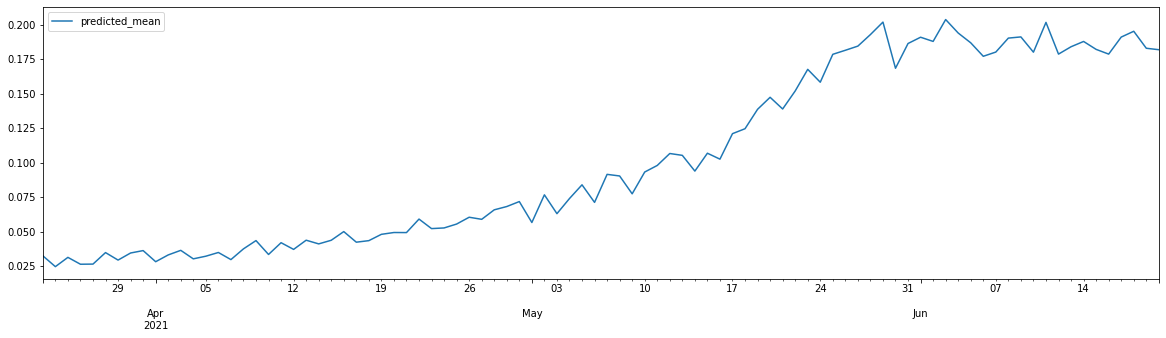

In [84]:
modela=SARIMAX(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:4] ,order=(2,0,4),seasonal_order=(2,0,1,14) )
modela=modela.fit()
start=len(traini)
end=len(traini)+len(testi)-1
pred=modela.predict(exog=test.iloc[:,0:4], start=start, end=end)

#pred.index=df.index[start:end+1]
pred.plot(legend='SARIMAX Predictions')


In [85]:
pred=pd.DataFrame(pred)
pred=pred.iloc[7:,:]
predictions=pd.DataFrame(predictions)
predictions.values.tolist()
predictions=predictions[0]
predictions.values.tolist()
predictions


0    -0.029708
1    -0.046091
2    -0.045794
3    -0.050525
4    -0.076790
        ...   
78    0.007358
79    0.015492
80    0.019497
81    0.005056
82    0.005864
Name: 0, Length: 83, dtype: float32

[0.00484859]
[-0.00979946]
[-0.01754955]
[-0.01736846]
[-0.04031626]
[-0.06906513]
[-0.07595217]
[-0.07541665]
[-0.09642262]
[-0.0997305]
[-0.09157918]
[-0.15533445]
[-0.14378237]
[-0.18824358]
[-0.13640716]
[-0.11265103]
[-0.15863093]
[-0.14285426]
[-0.1923776]
[-0.21497479]
[-0.1691525]
[-0.10866051]
[-0.10525492]
[-0.12951868]
[-0.17200837]
[-0.19407042]
[-0.19715045]
[-0.16426037]
[-0.13837873]
[-0.08661066]
[-0.09354318]
[-0.14565397]
[-0.21224465]
[-0.18767136]
[-0.12286947]
[-0.10159474]
[-0.08905276]
[-0.07336124]
[-0.13145703]
[-0.17903354]
[-0.12794684]
[-0.03071202]
[-0.00186007]
[-0.02413571]
[-0.05423432]
[-0.08217632]
[-0.07818115]
[-0.07166914]
[0.0028952]
[0.0305782]
[0.05357116]
[0.04988969]
[0.02298504]
[0.00690608]
[0.01632598]
[0.05793267]
[0.11368593]
[0.14599054]
[0.13851945]
[0.10257328]
[0.10735586]
[0.08112669]
[0.12559308]
[0.16020944]
[0.15966505]
[0.1976334]
[0.14266553]
[0.1026668]
[0.12910233]
[0.15511998]
[0.17588714]
[0.17832117]
[0.15856856]
[0.1835261]

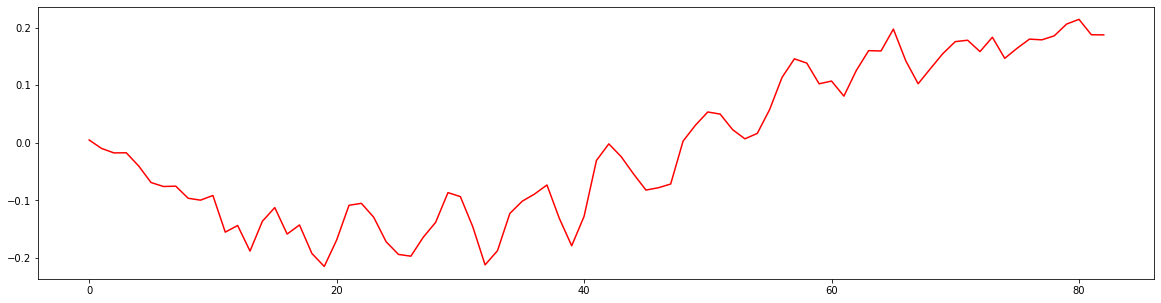

In [86]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predictions[i]
 pred_final.append(temp)
 print(temp)
error = mean_squared_error(test.iloc[:83,-1],pred_final)
print( error)
Y = pd.DataFrame(testi.iloc[7:,-1])


plt.plot(pred_final , color = 'r')
plt.show()

In [87]:
p3=pred_final
pred_final

[array([0.00484859]),
 array([-0.00979946]),
 array([-0.01754955]),
 array([-0.01736846]),
 array([-0.04031626]),
 array([-0.06906513]),
 array([-0.07595217]),
 array([-0.07541665]),
 array([-0.09642262]),
 array([-0.0997305]),
 array([-0.09157918]),
 array([-0.15533445]),
 array([-0.14378237]),
 array([-0.18824358]),
 array([-0.13640716]),
 array([-0.11265103]),
 array([-0.15863093]),
 array([-0.14285426]),
 array([-0.1923776]),
 array([-0.21497479]),
 array([-0.1691525]),
 array([-0.10866051]),
 array([-0.10525492]),
 array([-0.12951868]),
 array([-0.17200837]),
 array([-0.19407042]),
 array([-0.19715045]),
 array([-0.16426037]),
 array([-0.13837873]),
 array([-0.08661066]),
 array([-0.09354318]),
 array([-0.14565397]),
 array([-0.21224465]),
 array([-0.18767136]),
 array([-0.12286947]),
 array([-0.10159474]),
 array([-0.08905276]),
 array([-0.07336124]),
 array([-0.13145703]),
 array([-0.17903354]),
 array([-0.12794684]),
 array([-0.03071202]),
 array([-0.00186007]),
 array([-0.0241

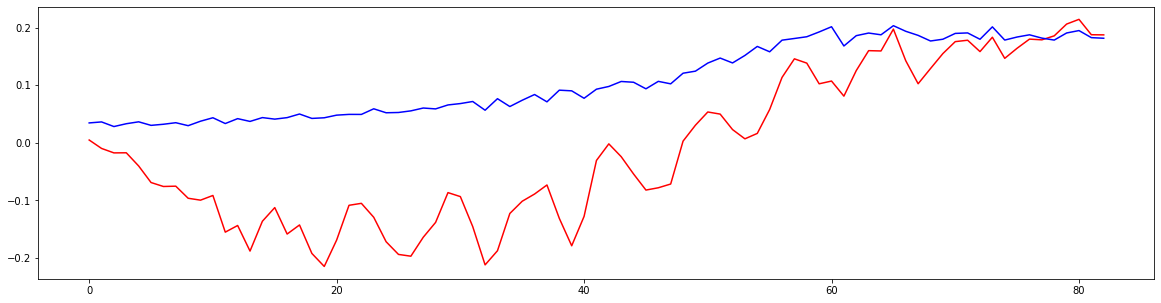

In [88]:
plt.plot(pred_final , label="SARIMAX+ANN", color = 'r')
plt.plot(pred , label="SARIMAX", color = 'b')

plt.show()

#**Exporting Results**

In [89]:
tmp=data1.iloc[-83:,:]

In [90]:
p1=list(p1)
p2=list(p2)
p3=list(p3)

In [91]:
tmp

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,
2/7/2022,2.231326e-04,0.000327,0.106087,0.000000,0.5371,0.000838,0.113977,0.308495,0.194313,0.013667,0.322443,0.137681,0.705109,0.004269
2/8/2022,2.711444e-04,0.000531,0.104348,0.083054,0.5355,0.000838,0.113977,0.308495,0.194313,0.013667,0.322443,0.137681,0.705109,0.002633
2/9/2022,2.600300e-04,0.000450,0.102609,0.000000,0.5355,0.000838,0.113977,0.308495,0.194313,0.013667,0.322443,0.137681,0.705109,0.003387
2/10/2022,2.302411e-04,0.000491,0.102609,0.000000,0.5355,0.000838,0.113977,0.308495,0.194313,0.013667,0.322443,0.137681,0.705109,0.004391
2/11/2022,2.364659e-04,0.000531,0.104348,0.000000,0.5355,0.000838,0.113977,0.308495,0.194313,0.013667,0.322443,0.137681,0.705109,0.003515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/26/2022,4.516456e-07,0.000000,0.140870,0.000000,0.4532,0.000838,0.113977,0.308495,0.194313,0.013667,0.322443,0.137681,0.705109,0.000128
4/27/2022,4.516456e-07,0.000000,0.133913,0.000000,0.4532,0.000838,0.113977,0.308495,0.194313,0.013667,0.322443,0.137681,0.705109,0.000128
4/28/2022,1.335300e-06,0.000000,0.128696,0.000000,0.4532,0.000838,0.113977,0.308495,0.194313,0.013667,0.322443,0.137681,0.705109,0.000128


In [92]:
i=0
for row,index in tmp.iterrows():
  tmp.iloc[i,13]=p1[i]
  i=i+1
jnk=pd.DataFrame(scaler.inverse_transform(tmp))
p1=jnk.iloc[:,-1]
p1

0     0.427960
1     0.391191
2     0.565838
3     0.527706
4     0.303114
        ...   
78    0.482524
79    0.316828
80    0.565076
81    0.405128
82    0.576778
Name: 13, Length: 83, dtype: float64

In [93]:
i=0
for row,index in tmp.iterrows():
  tmp.iloc[i,13]=p2[i]
  i=i+1
jnk=pd.DataFrame(scaler.inverse_transform(tmp))
p2=jnk.iloc[:,-1]
p2

0     13.406048
1     13.843116
2     12.593474
3     12.341088
4     12.610199
        ...    
78    18.581511
79    18.098473
80    22.113592
81    19.608552
82    22.007556
Name: 13, Length: 83, dtype: float64

In [94]:
i=0
for row,index in tmp.iterrows():
  tmp.iloc[i,13]=p3[i]
  i=i+1
jnk=pd.DataFrame(scaler.inverse_transform(tmp))
p3=jnk.iloc[:,-1]
p3

0      0.874623
1     -1.767695
2     -3.165711
3     -3.133045
4     -7.272530
        ...    
78    33.542527
79    37.233673
80    38.714760
81    33.891156
82    33.846868
Name: 13, Length: 83, dtype: float64

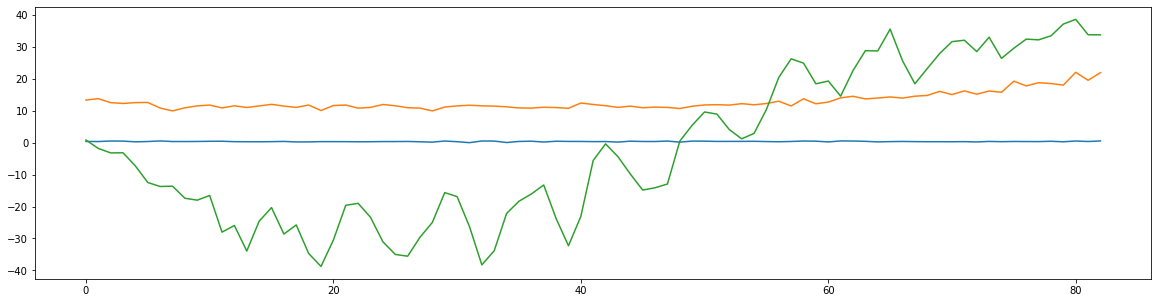

In [95]:
plt.plot(p1)
plt.plot(p2)
plt.plot(p3)
plt.show()

In [96]:
final={c[0]:p1,c[1]:p2,c[2]:p3}
final=pd.DataFrame(final)
final.to_csv('Output_2023_01_31.csv')